# Import packages

https://medium.com/@T_Jen/feature-importance-for-any-model-using-permutation-7997b7287aa#:~:text=Permutation%20feature%20importance%20measures%20the%20change%20in%20model

In [1]:
%run "settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

# Create user defined funtions

### Clean() - removes all string values from integer columns

In [2]:
def Clean(df):
    for df in dataframes:
        for col in df.columns:
            vals = ['nan', 'NP', 'NEW', 'SUPP', 'NE', 'NSE', 'NA', 'NaT', 'NAT', '', ' ', 'DNS', 'NAT_TOTSF']
            df[col] = df[col][~df[col].isin(vals)]
            if col == 'URN':
                extras = ['PRI', 'SEC']
                df[col] = df[col][~df[col].isin(extras)]
                df[col] = df[col].astype(float)   

### Join() - joins all academic years dataframes together

In [3]:
def Join(df, df1, df2, df3, df4):
    new_df = df.merge(df1, on='URN', suffixes=('', '_remove'))\
    .merge(df2, on='URN', suffixes=('', '_remove'))\
    .merge(df3, on='URN', suffixes=('', '_remove'))\
    .merge(df4, on='URN', suffixes=('', '_remove'))
    return new_df

### cumulatively_categorise() - deals with high cardinality categorical variables

In [4]:
def cumulatively_categorise(column, threshold = 0.75, return_categories_list = True):
    threshold_value = int(threshold*len(column))
    categories_list = []
    s = 0
    counts = Counter(column)
    
    for i,j in counts.most_common():
        s += counts[i]
        categories_list.append(i)
        if s >= threshold_value:
            break
    categories_list.append('Other')
    
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    
    if(return_categories_list):
        return new_column,categories_list
    else:
        return new_column

### State the file path

In [5]:
filepath = 'D:\\Schools Data\\Data\\'
#filepath = 'C:\\Users\\matth\\OneDrive\\Documents\\University\\Schools Data\\Data\\'

#  

# Import datasets

### 2010-2011

In [6]:
# Import the KS4 information
ks4_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_spine.csv', low_memory = False)

# Import absence data
abs_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_abs.csv', low_memory = False)

# Import school census data
census_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2010_2011['ACADEMIC_YEAR'] = 2011

# List the dataframes
dataframes = [ks4_2010_2011, spine_2010_2011, abs_2010_2011, census_2010_2011, teacher_info_2010_2011]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2010_2011 = Join(ks4_2010_2011, spine_2010_2011, abs_2010_2011, census_2010_2011, teacher_info_2010_2011)

# Select the relevant columns
ks4_2010_2011 = ks4_2010_2011[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA']]

### 2011-2012

In [7]:
# Import the KS4 information
ks4_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_spine.csv', low_memory = False)

# Import absence data
abs_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_abs.csv', low_memory = False)

# Import school census data
census_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2011_2012['ACADEMIC_YEAR'] = 2012

# List the dataframes
dataframes = [ks4_2011_2012, spine_2011_2012, abs_2011_2012, census_2011_2012, teacher_info_2011_2012]

# Use the function to clean the dataframes
Clean(dataframes)
                    
# Join all tables together
ks4_2011_2012 = Join(ks4_2011_2012, spine_2011_2012, abs_2011_2012, census_2011_2012, teacher_info_2011_2012)

# Select the relevant columns
ks4_2011_2012 = ks4_2011_2012[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA']]

### 2012-2013

In [8]:
# Import the KS4 information
ks4_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_ks4final.csv',  low_memory = False)

# Import the school information
spine_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_spine.csv', low_memory = False)

# Import absence data
abs_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_abs.csv', low_memory = False)

# Import school census data
census_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2012_2013['ACADEMIC_YEAR'] = 2013

# List the dataframes
dataframes = [ks4_2012_2013, spine_2012_2013, abs_2012_2013, census_2012_2013, teacher_info_2012_2013]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2012_2013 = Join(ks4_2012_2013, spine_2012_2013, abs_2012_2013, census_2012_2013, teacher_info_2012_2013)
 
# Select the relevant columns
ks4_2012_2013 = ks4_2012_2013[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA']]

### 2013-2014

In [9]:
# Import the KS4 information
ks4_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_ks4final.csv', low_memory = False, encoding='latin-1')

# Import the school information
spine_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_spine.csv', low_memory = False)

# Import absence data
abs_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_abs.csv', low_memory = False)

# Import school census data
census_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2013_2014['ACADEMIC_YEAR'] = 2014

# List the dataframes
dataframes = [ks4_2013_2014, spine_2013_2014, abs_2013_2014, census_2013_2014, teacher_info_2013_2014]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2013_2014 = Join(ks4_2013_2014, spine_2013_2014, abs_2013_2014, census_2013_2014, teacher_info_2013_2014)

# Select the relevant columns
ks4_2013_2014 = ks4_2013_2014[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ',
                               'PTL2BASICS_PTQ',
                               'TAVENT_E_PTQ',
                               'PTANYQ_PTQ',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA']]

### 2014-2015

In [10]:
# Import the KS4 information
ks4_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_spine.csv', low_memory = False)

# Import absence data
abs_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_abs.csv', low_memory = False)

# Import school census data
census_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2014_2015['ACADEMIC_YEAR'] = 2015

# List the dataframes
dataframes = [ks4_2014_2015, spine_2014_2015, census_2014_2015, teacher_info_2014_2015, abs_2014_2015]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2014_2015 = Join(ks4_2014_2015, spine_2014_2015, census_2014_2015, teacher_info_2014_2015, abs_2014_2015)

# Select the relevant columns
ks4_2014_2015 = ks4_2014_2015[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ_EE',
                               'PTL2BASICS_PTQ_EE',
                               'TAVENT_E_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'NFTETEA',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A']]

### 2015-2016

In [11]:
# Import the KS4 information
ks4_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_spine.csv', low_memory = False)

# Import absence data
abs_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_abs.csv', low_memory = False)

# Import school census data
census_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2015_2016['ACADEMIC_YEAR'] = 2016

# List the dataframes
dataframes = [ks4_2015_2016, spine_2015_2016, abs_2015_2016, census_2015_2016, teacher_info_2015_2016]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2015_2016 = Join(ks4_2015_2016, spine_2015_2016, abs_2015_2016, census_2015_2016, teacher_info_2015_2016)

# Select the relevant columns
ks4_2015_2016 = ks4_2015_2016[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ_EE',
                               'PTL2BASICS_LL_PTQ_EE',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A']]

### 2016-2017

In [12]:
# Import the KS4 information
ks4_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_spine.csv', low_memory = False)

# Import absence data
abs_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_abs.csv', low_memory = False)

# Import school census data
census_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_census.csv', low_memory = False)

# Import the provisionsal KS4 data
teacher_info_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2016_2017['ACADEMIC_YEAR'] = 2017

# List the dataframes
dataframes = [ks4_2016_2017, spine_2016_2017, census_2016_2017, teacher_info_2016_2017, abs_2016_2017]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2016_2017 = Join(ks4_2016_2017, spine_2016_2017, census_2016_2017, teacher_info_2016_2017, abs_2016_2017)

# Select the relevant columns
ks4_2016_2017 = ks4_2016_2017[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A']]

### 2017-2018

In [13]:
# Import the KS4 information
ks4_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_spine.csv', low_memory = False)

# Import absence data
abs_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_abs.csv',low_memory = False)

# Import school census data
census_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2017_2018['ACADEMIC_YEAR'] = 2018

# List the dataframes
dataframes = [ks4_2017_2018, spine_2017_2018, abs_2017_2018, census_2017_2018, teacher_info_2017_2018]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2017_2018 = Join(ks4_2017_2018, spine_2017_2018, abs_2017_2018, census_2017_2018, teacher_info_2017_2018) 

# Select the relevant columns
ks4_2017_2018 = ks4_2017_2018[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers (£s)',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A']]

### 2018-2019

In [14]:
# Import the KS4 information
ks4_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_school_information.csv', low_memory = False)

# Import absence data
abs_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_abs.csv', low_memory = False)

# Import school census data
census_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2018_2019['ACADEMIC_YEAR'] = 2019

# List the dataframes
dataframes = [ks4_2018_2019, spine_2018_2019, abs_2018_2019, census_2018_2019, teacher_info_2018_2019]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2018_2019 = Join(ks4_2018_2019, spine_2018_2019, abs_2018_2019, census_2018_2019, teacher_info_2018_2019)

# Select the relevant columns
ks4_2018_2019 = ks4_2018_2019[['URN',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'TOTPUPS',
                               'Total Number of Teachers (Full-Time Equivalent)',
                               'Mean Gross FTE Salary of All Teachers (£s)',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A']]

#  

# Data Cleaning

### Renaming variables to ensure coherence across datasets and allow for joining

In [15]:
# 2013/14
dict = {'PTAC5EM_PTQ' : 'PTAC5EM',
        'PTL2BASICS_PTQ': 'PTL2BASICS',
        'TAVENT_E_PTQ' : 'TAVENT_E',
        'PTANYQ_PTQ': 'PTANYQ',
        }
ks4_2013_2014.rename(columns=dict, inplace=True)

# 2014/15
dict = {'PTAC5EM_PTQ_EE' : 'PTAC5EM',
        'PTL2BASICS_PTQ_EE': 'PTL2BASICS',
        'TAVENT_E_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',
        'PTFSM6CLA1A' : 'PTFSMCLA'
        }
ks4_2014_2015.rename(columns=dict, inplace=True)

# 2015/16
dict = {'PTAC5EM_PTQ_EE': 'PTAC5EM',
        'PTL2BASICS_LL_PTQ_EE': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
        }
ks4_2015_2016.rename(columns=dict, inplace=True)

# 2016/17
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
       }
ks4_2016_2017.rename(columns=dict, inplace=True)

# 2017/18
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers (£s)' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
       }
ks4_2017_2018.rename(columns=dict, inplace=True)

# 2018/19
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',    
        'FSM' : 'PNUMFSM',    
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers (£s)' : 'SALARY',
        'Total Number of Teachers (Full-Time Equivalent)' : 'NFTETEA',
        'PTFSM6CLA1A' : 'PTFSMCLA'
       }
ks4_2018_2019.rename(columns=dict, inplace=True)

#  

### Stack the data tables

In [16]:
stacked_data = pd.concat([ks4_2011_2012, 
                          ks4_2012_2013,
                          ks4_2013_2014,
                          ks4_2014_2015,
                          ks4_2015_2016,
                          ks4_2016_2017,
                          ks4_2017_2018,
                          ks4_2018_2019], 
                         ignore_index=True)

nulls = stacked_data.isna().sum().to_frame()
nulls = nulls.rename(columns= {0: 'nulls'})

zeros = stacked_data.isin([0]).sum(axis=0).to_frame()
zeros = zeros.rename(columns= {0: 'zeros'})

len(stacked_data)

26390

### Convert data to float, create Pupil:Teacher ratio 'RATPUPTEA' and remove rows with null values


In [17]:
stacked_data["RELDENOM"].fillna("Does not apply", inplace = True)
stacked_data["ADMPOL"].fillna("Does not apply", inplace = True)

# Derive pupil:teacher ratio
stacked_data[["NFTETEA", "TOTPUPS"]] = stacked_data[["NFTETEA", "TOTPUPS"]].astype(float)
stacked_data['RATPUPTEA'] = (stacked_data["TOTPUPS"] / stacked_data["NFTETEA"])
stacked_data = stacked_data.drop(['TOTPUPS', 'NFTETEA'], axis=1)

# Drop NULL values
stacked_data_clean = stacked_data.dropna()

len(stacked_data_clean)

24021

#  

# Import the Ofsted Data and clean it 

https://www.gov.uk/government/statistical-data-sets/monthly-management-information-ofsteds-school-inspections-outcomes

In [18]:
latest_ratings_2019 = pd.read_csv(filepath + 'Management_information_-_schools_Table1_-_31_August_2019.csv',
                                  encoding = 'cp1252',
                                  low_memory = False)

latest_ratings_2020 = pd.read_csv(filepath + 'Management_information_-_state-funded_schools_-_latest_inspections_at_31_December_2020.csv',
                                  encoding = 'cp1252',
                                  low_memory = False)

latest_ratings = pd.concat([latest_ratings_2019, 
                            latest_ratings_2020], 
                           ignore_index = False)

In [19]:
# Replace spaces in column names with '_'
latest_ratings.columns = latest_ratings.columns.str.replace(' ', '_')

# Filter to specific inspection types
latest_ratings = latest_ratings[(latest_ratings['Event_type_grouping'] == 'Schools - S5') |
                                (latest_ratings['Event_type_grouping'] == 'Section 8 deemed section 5 (excluding short inspections)') |
                                (latest_ratings['Event_type_grouping'] == 'Short inspection converted')]

# Select only Secondary schoold
latest_ratings = latest_ratings[(latest_ratings['Ofsted_phase'] == 'Secondary')]

In [20]:
latest_ratings = latest_ratings[['URN',
                                 'Inspection_end_date',
                                 'Overall_effectiveness', # Target variable
                                 'Previous_inspection_end_date',
                                 'Previous_full_inspection_overall_effectiveness',
                                 'Previous_category_of_concern', 
                                 'The_income_deprivation_affecting_children_index_(IDACI)_quintile']]

latest_ratings["Previous_category_of_concern"].fillna("No concern", inplace = True)

latest_ratings = latest_ratings.dropna()

len(latest_ratings)

4856

## Extract the academic year from the inspection data to create a linkage year

In [21]:
# Split the year column into day, month and year
latest_ratings[["DAY", "MONTH", "YEAR"]] = latest_ratings["Inspection_end_date"].str.split("/", expand = True)

# Convert these values to integers
latest_ratings[['MONTH', 'YEAR']] = latest_ratings[['MONTH', 'YEAR']].astype(int)

# Derive the academic year
def flag_df(df):
    if (df['MONTH'] >= 9):
        return df['YEAR'] + 1
    elif (df['MONTH'] <= 8):
        return df['YEAR']
    
latest_ratings['ACADEMIC_YEAR'] = latest_ratings.apply(flag_df, axis = 1)

# Count number of days since the last inspection
latest_ratings['Inspection_end_date'] = pd.to_datetime(latest_ratings['Inspection_end_date'],
                                                           format = "%d/%m/%Y")
latest_ratings['Previous_inspection_end_date'] = pd.to_datetime(latest_ratings['Previous_inspection_end_date'],
                                                           format = "%d/%m/%Y")

latest_ratings['DAYS_SINCE_LAST'] = (latest_ratings['Inspection_end_date'] - latest_ratings['Previous_inspection_end_date']) / np.timedelta64(1, 'D')

# Do YEAR - 1
latest_ratings['LINKAGE_YEAR'] = latest_ratings['ACADEMIC_YEAR'] - 1

len(latest_ratings)

4856

In [22]:
# Count the number of schools that haven't been inspected for he last 4 years
over_4_years = latest_ratings[latest_ratings['DAYS_SINCE_LAST'] > ((365 * 3) + 366)]
over_4_years = over_4_years.drop_duplicates(subset = 'URN')
non_duplicate_schools = latest_ratings.drop_duplicates(subset = 'URN')
print(f"There are {len(over_4_years)} out of {len(non_duplicate_schools)} schools that have failed to meet Ofsteds criteria of inspection every 4 years")

There are 773 out of 2588 schools that have failed to meet Ofsteds criteria of inspection every 4 years


## Join the most recent OFSTED rating to the academic data and drop rows with null values

In [23]:
final_table = pd.merge(stacked_data_clean, 
                       latest_ratings, 
                       how='left', 
                       left_on=['URN','ACADEMIC_YEAR'], 
                       right_on = ['URN','LINKAGE_YEAR'])

# Select columns needed
final_table = final_table.drop(['ACADEMIC_YEAR_x',
                                'ACADEMIC_YEAR_y',
                                'LINKAGE_YEAR',
                                'DAY', 
                                'MONTH', 
                                'YEAR', 
                                'Previous_inspection_end_date',
                                'Inspection_end_date'], 
                               axis=1)

# Drop any missing columns
final_table = final_table.dropna()
final_table = final_table.drop_duplicates(subset=['URN'])

len(final_table)

1699

#  

# Getting dummy variables for all categorical variables

In [24]:
remapped_reldenom = {'Does not apply' : '0',
                     'Roman Catholic': "1",
                     'Church of England' : "1", 
                     'Roman Catholic/Church of England' : "1",
                     'Church of England/Roman Catholic' : "1",
                     'Church of England/Christian' : "1",
                     'Unknown' : "0",
                     'Christian' : '1',
                     'Muslim' : '1',
                     'Sikh' : '1',
                     'Jewish' : '1',
                     'None' : '0',
                     None : '0'} 

final_table = final_table.replace({"RELDENOM": remapped_reldenom})

In [25]:
previous_category_concern = {'SM' : "1", 
                             'SWK' : "1",
                             'NTI' : '1',
                             'No concern' : '0'}  

final_table = final_table.replace({"Previous_category_of_concern": previous_category_concern})

In [26]:
admission_policy = {'COMP' : "0", 
                    'SEL' : "1",
                    'MOD' : '1'}  

final_table = final_table.replace({"ADMPOL": admission_policy})

In [27]:
gender = {'Girls' : "0", 
          'Boys' : "0",
          'Mixed' : '1'}  

final_table = final_table.replace({"GENDER": gender})

In [31]:
final_table['NFTYPE'] = cumulatively_categorise(final_table['NFTYPE'], 
                                                return_categories_list = False)

In [32]:
# Filter to remove 'UK' from ADMPOL
vals = ['0', '1']
final_table = final_table[final_table['ADMPOL'].isin(vals)]

final_table = pd.get_dummies(final_table, 
                             columns = ['NFTYPE',
                                        'Previous_full_inspection_overall_effectiveness',
                                        'The_income_deprivation_affecting_children_index_(IDACI)_quintile'])

# Replace boolean values with integers
final_table = final_table.replace(to_replace = True,  value = 1) 
final_table = final_table.replace(to_replace = False, value = 0) 

final_table

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,...,Previous_category_of_concern,DAYS_SINCE_LAST,NFTYPE_AC,NFTYPE_ACC,NFTYPE_CY,NFTYPE_Other,Previous_full_inspection_overall_effectiveness_1.0,Previous_full_inspection_overall_effectiveness_2.0,Previous_full_inspection_overall_effectiveness_3.0,Previous_full_inspection_overall_effectiveness_4.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_1.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_2.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_3.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_4.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_5.0
5,100055.00,26.8,67%,67%,11.3,100%,5.9,48436,1,0,0,1,1,62.1,54%,...,0,1212.00,0,0,0,1,0,0,1,0,0,0,0,0,1
8,100051.00,26.3,62%,63%,10.8,98%,5.9,48289,1,0,0,0,1,87.8,73%,...,0,527.00,0,0,1,0,0,0,1,0,0,0,0,0,1
18,105135.00,27.3,64%,64%,12.9,100%,4.7,44842,0,0,0,1,1,45.3,42%,...,0,1883.00,1,0,0,0,0,1,0,0,0,0,0,0,1
24,131609.00,26.5,57%,57%,12.4,100%,4.8,44124,1,0,0,0,1,40.0,59%,...,0,1211.00,1,0,0,0,0,0,1,0,0,0,0,0,1
27,137442.00,25.6,52%,52%,10.2,100%,5.1,46350,1,0,0,0,0,68.6,69%,...,0,1827.00,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22228,105989.00,28.7,61%,68%,8.1,100%,5.60,"£39,416",1,0,0,1,1,7.4,26%,...,0,756.00,0,0,0,1,0,0,1,0,0,0,0,1,0
22233,106538.00,29.4,56%,59%,8.7,100%,5.40,"£39,014",1,0,0,1,1,4.6,18%,...,0,854.00,0,0,0,1,0,0,1,0,0,0,1,0,0
22237,135935.00,27.1,46%,48%,8.1,100%,7.40,"£33,755",1,0,0,0,1,7.1,46%,...,0,805.00,1,0,0,0,0,0,1,0,0,0,0,0,1
22259,135936.00,27.9,44%,50%,6.9,97%,7.10,"£39,638",0,0,0,0,1,15.7,34%,...,0,854.00,1,0,0,0,0,0,1,0,0,0,0,1,0


#  

# Clean the Data

In [33]:
# Remove any special characters such as a % or £ from values in the data
final_table = final_table.apply(lambda x: x.astype(str).str.replace('%',''))
final_table = final_table.apply(lambda x: x.astype(str).str.replace('£',''))
final_table = final_table.apply(lambda x: x.astype(str).str.replace(',',''))

# Convert the data to a float data type
final_table = final_table.astype(float)

final_table

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,...,Previous_category_of_concern,DAYS_SINCE_LAST,NFTYPE_AC,NFTYPE_ACC,NFTYPE_CY,NFTYPE_Other,Previous_full_inspection_overall_effectiveness_1.0,Previous_full_inspection_overall_effectiveness_2.0,Previous_full_inspection_overall_effectiveness_3.0,Previous_full_inspection_overall_effectiveness_4.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_1.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_2.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_3.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_4.0,The_income_deprivation_affecting_children_index_(IDACI)_quintile_5.0
5,100055.00,26.80,67.00,67.00,11.30,100.00,5.90,48436.00,1.00,0.00,0.00,1.00,1.00,62.10,54.00,...,0.00,1212.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
8,100051.00,26.30,62.00,63.00,10.80,98.00,5.90,48289.00,1.00,0.00,0.00,0.00,1.00,87.80,73.00,...,0.00,527.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
18,105135.00,27.30,64.00,64.00,12.90,100.00,4.70,44842.00,0.00,0.00,0.00,1.00,1.00,45.30,42.00,...,0.00,1883.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
24,131609.00,26.50,57.00,57.00,12.40,100.00,4.80,44124.00,1.00,0.00,0.00,0.00,1.00,40.00,59.00,...,0.00,1211.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
27,137442.00,25.60,52.00,52.00,10.20,100.00,5.10,46350.00,1.00,0.00,0.00,0.00,0.00,68.60,69.00,...,0.00,1827.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22228,105989.00,28.70,61.00,68.00,8.10,100.00,5.60,39416.00,1.00,0.00,0.00,1.00,1.00,7.40,26.00,...,0.00,756.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
22233,106538.00,29.40,56.00,59.00,8.70,100.00,5.40,39014.00,1.00,0.00,0.00,1.00,1.00,4.60,18.00,...,0.00,854.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
22237,135935.00,27.10,46.00,48.00,8.10,100.00,7.40,33755.00,1.00,0.00,0.00,0.00,1.00,7.10,46.00,...,0.00,805.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
22259,135936.00,27.90,44.00,50.00,6.90,97.00,7.10,39638.00,0.00,0.00,0.00,0.00,1.00,15.70,34.00,...,0.00,854.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [35]:
# Rename the new variables to follow the format of the others
dict = {'Overall_effectiveness': 'RECENT_SCORE', 
        'NFTYPE_AC' : 'ACADEMY_NFTYPE_DUMMY',
        'NFTYPE_ACC' : 'ACC_NFTYPE_DUMMY', 
        'NFTYPE_CY' : 'CY_NFTYPE_DUMMY',
        'NFTYPE_Other' : 'OTHER_NFTYPE_DUMMY', 
        'Previous_full_inspection_overall_effectiveness_1.0' : 'OUTSTANDING_PREVIOUS',
        'Previous_full_inspection_overall_effectiveness_2.0' : 'GOOD_PREVIOUS',
        'Previous_full_inspection_overall_effectiveness_3.0' : 'REQUIRES_IMPROVEMENT_PREVIOUS',
        'Previous_full_inspection_overall_effectiveness_4.0' : 'INADEQUATE_PREVIOUS',
        'The_income_deprivation_affecting_children_index_(IDACI)_quintile_1.0' : 'IDACI_DECILE_1_DUMMY',
        'The_income_deprivation_affecting_children_index_(IDACI)_quintile_2.0' : 'IDACI_DECILE_2_DUMMY',
        'The_income_deprivation_affecting_children_index_(IDACI)_quintile_3.0' : 'IDACI_DECILE_3_DUMMY',
        'The_income_deprivation_affecting_children_index_(IDACI)_quintile_4.0' : 'IDACI_DECILE_4_DUMMY',
        'The_income_deprivation_affecting_children_index_(IDACI)_quintile_5.0' : 'IDACI_DECILE_5_DUMMY',
        'Previous_category_of_concern' : 'PREVIOUS_CONCERN'}

final_table.rename(columns=dict,
                   inplace=True)

final_table

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,...,PREVIOUS_CONCERN,DAYS_SINCE_LAST,ACADEMY_NFTYPE_DUMMY,ACC_NFTYPE_DUMMY,CY_NFTYPE_DUMMY,OTHER_NFTYPE_DUMMY,OUTSTANDING_PREVIOUS,GOOD_PREVIOUS,REQUIRES_IMPROVEMENT_PREVIOUS,INADEQUATE_PREVIOUS,IDACI_DECILE_1_DUMMY,IDACI_DECILE_2_DUMMY,IDACI_DECILE_3_DUMMY,IDACI_DECILE_4_DUMMY,IDACI_DECILE_5_DUMMY
5,100055.00,26.80,67.00,67.00,11.30,100.00,5.90,48436.00,1.00,0.00,0.00,1.00,1.00,62.10,54.00,...,0.00,1212.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
8,100051.00,26.30,62.00,63.00,10.80,98.00,5.90,48289.00,1.00,0.00,0.00,0.00,1.00,87.80,73.00,...,0.00,527.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
18,105135.00,27.30,64.00,64.00,12.90,100.00,4.70,44842.00,0.00,0.00,0.00,1.00,1.00,45.30,42.00,...,0.00,1883.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
24,131609.00,26.50,57.00,57.00,12.40,100.00,4.80,44124.00,1.00,0.00,0.00,0.00,1.00,40.00,59.00,...,0.00,1211.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
27,137442.00,25.60,52.00,52.00,10.20,100.00,5.10,46350.00,1.00,0.00,0.00,0.00,0.00,68.60,69.00,...,0.00,1827.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22228,105989.00,28.70,61.00,68.00,8.10,100.00,5.60,39416.00,1.00,0.00,0.00,1.00,1.00,7.40,26.00,...,0.00,756.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
22233,106538.00,29.40,56.00,59.00,8.70,100.00,5.40,39014.00,1.00,0.00,0.00,1.00,1.00,4.60,18.00,...,0.00,854.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
22237,135935.00,27.10,46.00,48.00,8.10,100.00,7.40,33755.00,1.00,0.00,0.00,0.00,1.00,7.10,46.00,...,0.00,805.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
22259,135936.00,27.90,44.00,50.00,6.90,97.00,7.10,39638.00,0.00,0.00,0.00,0.00,1.00,15.70,34.00,...,0.00,854.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


# Normalise the Data

In [37]:
for col in final_table[['KS2APS',
                        'PTAC5EM',
                        'PTL2BASICS',
                        'TAVENT_E',
                        'PTANYQ',
                        'PERCTOT',
                        'PTFSMCLA',
                        'SALARY',
                        'PNUMEAL',
                        'RATPUPTEA', 
                        'DAYS_SINCE_LAST']]:
    
    final_table[col] = (final_table[col] - final_table[col].mean()) / final_table[col].std()  

pd.set_option('display.max_columns', None) 
final_table.head()

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,RATPUPTEA,RECENT_SCORE,PREVIOUS_CONCERN,DAYS_SINCE_LAST,ACADEMY_NFTYPE_DUMMY,ACC_NFTYPE_DUMMY,CY_NFTYPE_DUMMY,OTHER_NFTYPE_DUMMY,OUTSTANDING_PREVIOUS,GOOD_PREVIOUS,REQUIRES_IMPROVEMENT_PREVIOUS,INADEQUATE_PREVIOUS,IDACI_DECILE_1_DUMMY,IDACI_DECILE_2_DUMMY,IDACI_DECILE_3_DUMMY,IDACI_DECILE_4_DUMMY,IDACI_DECILE_5_DUMMY
5,100055.00,-0.71,0.76,0.56,1.07,0.60,0.15,3.36,1.00,0.00,0.00,1.00,1.00,2.54,1.48,-0.64,2.00,0.00,0.09,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
8,100051.00,-1.10,0.39,0.26,0.76,-1.00,0.15,3.31,1.00,0.00,0.00,0.00,1.00,3.91,2.63,-0.46,2.00,0.00,-1.36,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
18,105135.00,-0.33,0.54,0.33,2.10,0.60,-0.87,2.08,0.00,0.00,0.00,1.00,1.00,1.65,0.75,-1.05,2.00,0.00,1.52,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
24,131609.00,-0.94,0.02,-0.20,1.78,0.60,-0.79,1.83,1.00,0.00,0.00,0.00,1.00,1.36,1.78,5.27,2.00,0.00,0.09,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
27,137442.00,-1.63,-0.35,-0.59,0.37,0.60,-0.53,2.62,1.00,0.00,0.00,0.00,0.00,2.89,2.39,-0.48,1.00,0.00,1.40,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


#  

https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/

# To understand which variable to drop for the dummy variable trap, the most common variable will be dropped
print(final_table.ACADEMY_NFTYPE_DUMMY.value_counts())
print(final_table.ACC_NFTYPE_DUMMY.value_counts())
print(final_table.CY_NFTYPE_DUMMY.value_counts())
print(final_table.OTHER_NFTYPE_DUMMY.value_counts())

print(final_table.OUTSTANDING_PREVIOUS.value_counts())
print(final_table.GOOD_PREVIOUS.value_counts())
print(final_table.REQUIRES_IMPROVEMENT_PREVIOUS.value_counts())
print(final_table.INADEQUATE_PREVIOUS.value_counts())

print(final_table.IDACI_DECILE_1_DUMMY.value_counts())
print(final_table.IDACI_DECILE_2_DUMMY.value_counts())
print(final_table.IDACI_DECILE_3_DUMMY.value_counts())
print(final_table.IDACI_DECILE_4_DUMMY.value_counts())
print(final_table.IDACI_DECILE_5_DUMMY.value_counts())

In [41]:
# Drop variables that will cause the variable trap
dropped_columns = ['URN',
                   'ACC_NFTYPE_DUMMY',
                   'REQUIRES_IMPROVEMENT_PREVIOUS',
                   'IDACI_DECILE_5_DUMMY']

final_table = final_table.drop(columns = dropped_columns)

In [122]:
final_table.columns

Index(['KS2APS', 'PTAC5EM', 'PTL2BASICS', 'TAVENT_E', 'PTANYQ', 'PERCTOT',
       'SALARY', 'ISPOST16', 'ISPRIMARY', 'ADMPOL', 'RELDENOM', 'GENDER',
       'PNUMEAL', 'PTFSMCLA', 'RATPUPTEA', 'RECENT_SCORE', 'PREVIOUS_CONCERN',
       'DAYS_SINCE_LAST', 'ACADEMY_NFTYPE_DUMMY', 'CY_NFTYPE_DUMMY',
       'OTHER_NFTYPE_DUMMY', 'OUTSTANDING_PREVIOUS', 'GOOD_PREVIOUS',
       'INADEQUATE_PREVIOUS', 'IDACI_DECILE_1_DUMMY', 'IDACI_DECILE_2_DUMMY',
       'IDACI_DECILE_3_DUMMY', 'IDACI_DECILE_4_DUMMY'],
      dtype='object')

In [43]:
y = final_table.RECENT_SCORE # Target variable

In [44]:
dropped_columns = ['RECENT_SCORE']
X = final_table.drop(columns = dropped_columns)

In [45]:
random_seed = 42

In [46]:
feature_cols = ['KS2APS', 
                'PTAC5EM', 
                'PTL2BASICS', 
                'TAVENT_E', 
                'PTANYQ',
                'PERCTOT', 
                'SALARY',
                'ISPOST16', 
                'ISPRIMARY',
                'RELDENOM', 
                'GENDER',
                'ADMPOL',
                'PNUMEAL',
                'PTFSMCLA', 
                'RATPUPTEA', 
                'PREVIOUS_CONCERN', 
                'DAYS_SINCE_LAST', 
                'ACADEMY_NFTYPE_DUMMY',
                'CY_NFTYPE_DUMMY',
                'OTHER_NFTYPE_DUMMY',
                'GOOD_PREVIOUS', 
                'OUTSTANDING_PREVIOUS',
                'INADEQUATE_PREVIOUS', 
                'IDACI_DECILE_1_DUMMY',
                'IDACI_DECILE_2_DUMMY',
                'IDACI_DECILE_3_DUMMY', 
                'IDACI_DECILE_4_DUMMY']

#  

# Model 1: Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [73]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, 
                                                            y, 
                                                            random_state = random_seed,
                                                            test_size = 0.2, # 80% training and 20% test
                                                            stratify = y) # Uses stratified sampling

In [74]:
# Create Decision Tree classifier object with pruning
unpruned_tree = DecisionTreeClassifier(random_state = random_seed)

# Train Decision Tree Classifier
unpruned_tree.fit(X_train_1,
                  y_train_1)

# Predict the response for test dataset
y_pred_1 = unpruned_tree.predict(X_test_1)

# Implement 5-fold cross-validation
scores = cross_val_score(unpruned_tree, 
                         X_train_1, 
                         y_train_1, 
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.61660079 0.60714286 0.59920635 0.61904762 0.61507937]
Mean accuracy: 61.1 %


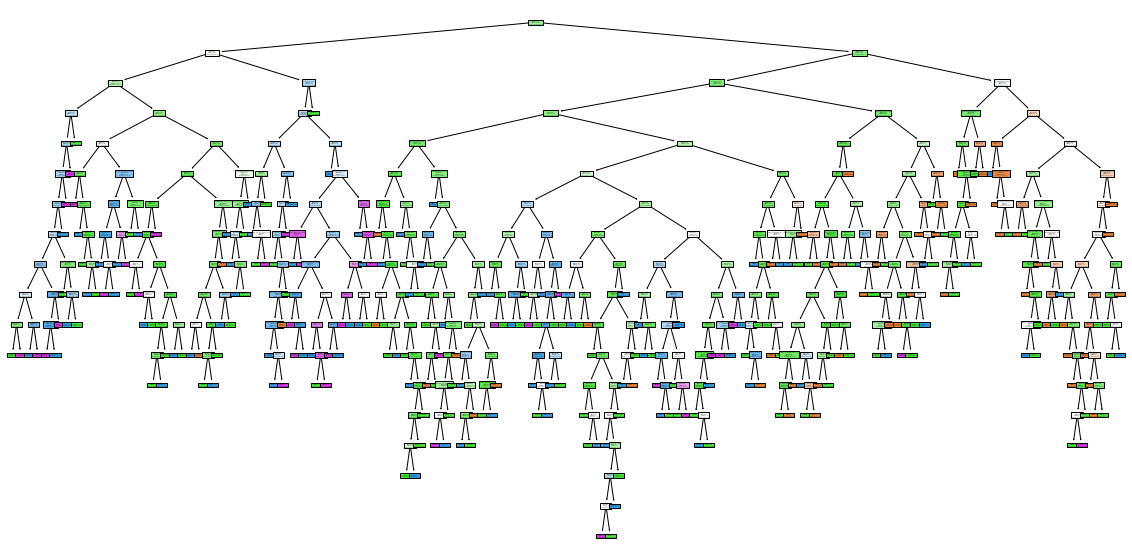

In [41]:
plt.figure(figsize=(20,10))

plot_tree(unpruned_tree, 
          filled = True, 
          feature_names = feature_cols)

plt.show()

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, # 80% training and 20% test
                                                            random_state = random_seed,
                                                            stratify = y) # Uses stratified sampling

In [42]:
startTime = time.time()

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'criterion' : ('gini', 'entropy'),
              'splitter' : ('best', 'random'),
              'max_depth' : (None, 2, 3, 4, 5, 6, 7, 8, 9, 10),
              'min_samples_split' : (2, 3, 4),
              'min_samples_leaf' : (1, 2, 3),
              'max_features' : (None, 'sqrt', 'log2'),
              'random_state' : ([41]),
              'max_leaf_nodes': (10, 11, 12, 13, 14, 15, None),
              'min_impurity_decrease': ([0.0, 0.002, 0.003, 0.004]), 
              'class_weight' : (None, 'balanced'),
              'ccp_alpha': (0, 0.000001, 0.000002, 0.000003)}

# Create Grid Search object
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 5)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)

print('')
print("Mean accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
ccp_alpha: 0
class_weight: None
criterion: entropy
max_depth: 5
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.002
min_samples_leaf: 2
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: 41
splitter: random

Mean accuracy: 63.9 %

Execution time in seconds: 1717.55246758461


In [75]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, # 80% training and 20% test
                                                            random_state = random_seed,
                                                            stratify = y) # Uses stratified sampling

In [76]:
# Create Decision Tree classifier object with pruning
pruned_tree = DecisionTreeClassifier(ccp_alpha = 0,
                                     class_weight = None,
                                     criterion = 'entropy',
                                     max_depth = 5,
                                     max_features = None,
                                     max_leaf_nodes = None,
                                     min_impurity_decrease = 0.002,
                                     min_samples_leaf = 2,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     random_state = 41,
                                     splitter = 'random')

# Implement 5-fold cross-validation
scores = cross_val_score(pruned_tree,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

pruned_tree.fit(X_train_3,
                y_train_3)

y_pred_3 = pruned_tree.predict(X_test_3)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 2) * 100 , '%')

Accuracy scores: [0.67588933 0.67063492 0.68253968 0.67063492 0.67460317]
Mean accuracy: 67.0 %


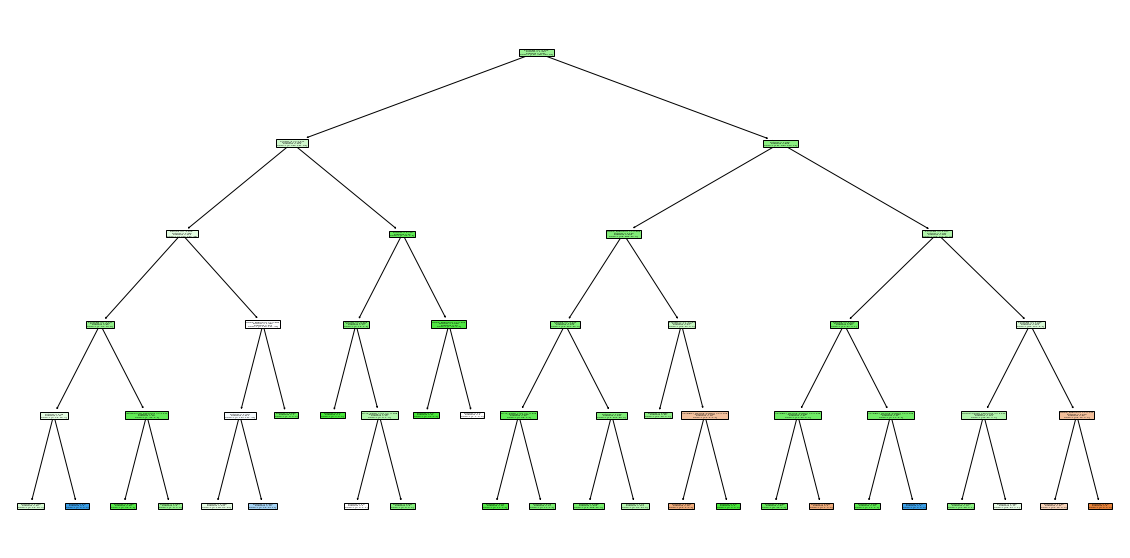

In [44]:
plt.figure(figsize=(20,10))

plot_tree(pruned_tree, 
          filled=True, 
          feature_names=feature_cols)
plt.show()

In [77]:
print('\tClassification Report for Base Decision Tree :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Base Decision Tree :

                       precision    recall  f1-score   support

         Outstanding       0.46      0.47      0.46        34
                Good       0.74      0.70      0.72       200
Requires Improvement       0.36      0.39      0.38        66
          Inadequate       0.20      0.25      0.22        16

            accuracy                           0.59       316
           macro avg       0.44      0.45      0.45       316
        weighted avg       0.60      0.59      0.60       316



In [78]:
print('\tClassification Report for Tuned Decision Tree :\n\n',
      classification_report(y_test_3,
                            y_pred_3,
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Tuned Decision Tree :

                       precision    recall  f1-score   support

         Outstanding       0.54      0.21      0.30        34
                Good       0.67      0.94      0.78       200
Requires Improvement       0.33      0.12      0.18        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.64       316
           macro avg       0.39      0.32      0.31       316
        weighted avg       0.55      0.64      0.56       316



C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
permutation_importance_base_tree = permutation_importance(unpruned_tree, 
                                                          X_train_1, 
                                                          y_train_1, 
                                                          n_repeats=10, 
                                                          random_state=42)

feat_importances_base_tree = pd.DataFrame(permutation_importance_base_tree.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

feat_importances_base_tree.reset_index(inplace=True)
feat_importances_base_tree.columns = ['Feature', 'Importance']
feat_importances_base_tree['Model'] = 'Base Tree'

In [80]:
permutation_importance_pruned_tree = permutation_importance(pruned_tree, 
                                                            X_train_3, 
                                                            y_train_3, 
                                                            n_repeats=10, 
                                                            random_state=42)

feat_importances_tuned_tree = pd.DataFrame(permutation_importance_pruned_tree.importances_mean, 
                                index = X_test_3.columns, 
                                columns=["Importance"])

feat_importances_tuned_tree.reset_index(inplace=True)
feat_importances_tuned_tree.columns = ['Feature', 'Importance']

feat_importances_tuned_tree['Model'] = 'Tuned Tree'

In [81]:
feature_importances_decision_trees = pd.concat([feat_importances_base_tree, 
                                                feat_importances_tuned_tree], 
                                               axis=0, 
                                               ignore_index=True)

#  

# Model 2: KNN 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [82]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, # 80% training and 20% test
                                                            random_state = random_seed,
                                                            stratify = y) # stratify the data 

In [83]:
# Base model
knn_1 = KNeighborsClassifier() # Initializing model

# Train model
knn_1.fit(X_train_1, 
          y_train_1) # Fitting model to the training set

# Predict the reponse 
y_pred_1 = knn_1.predict(X_test_1) # Predicting the outcomes 

# Implement 5-fold cross validation
scores = cross_val_score(knn_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores: ", scores)

# Calculate accuracy score
accuracy = accuracy_score(y_test_1, 
                          y_pred_1)

print("Mean accuracy:", round(accuracy, 3) * 100 , '%')

Accuracy scores:  [0.64426877 0.69444444 0.61904762 0.67857143 0.69444444]
Mean accuracy: 66.5 %


In [52]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, # 80% training and 20% test
                                                            random_state = random_seed,
                                                            stratify = y) # Uses stratified sampling

In [53]:
startTime = time.time()

# Create Decision Tree classifier object
clf = KNeighborsClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors' : (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
              'weights' : ('uniform', 'distance', None),
              'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size' : (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
              'p' : (1, 2, 3),
              'metric' : (['minkowski'])}

# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)

print('')
print("Mean accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
algorithm: auto
leaf_size: 1
metric: minkowski
n_neighbors: 15
p: 2
weights: uniform

Mean accuracy: 65.5 %

Execution time in seconds: 681.3577876091003


In [84]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, # 80% training and 20% test
                                                            random_state = random_seed,
                                                            stratify = y) # Uses stratified sampling

In [85]:
# Create Decision Tree classifier object with pruning
tuned_KNN = KNeighborsClassifier(algorithm = 'auto',
                                 leaf_size = 1,
                                 metric = 'minkowski',
                                 n_neighbors = 15,
                                 p = 2,
                                 weights = 'uniform')

# Implement 5-fold cross-validation
scores = cross_val_score(tuned_KNN,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

tuned_KNN.fit(X_train_3,
              y_train_3)

y_pred_3 = tuned_KNN.predict(X_test_3)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 2) * 100 , '%')

Accuracy scores: [0.68774704 0.71031746 0.66269841 0.69047619 0.72619048]
Mean accuracy: 70.0 %


In [86]:
print('\tClassification Report for Base KNN :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Base KNN :

                       precision    recall  f1-score   support

         Outstanding       0.62      0.24      0.34        34
                Good       0.72      0.89      0.79       200
Requires Improvement       0.44      0.36      0.40        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.66       316
           macro avg       0.44      0.37      0.38       316
        weighted avg       0.61      0.66      0.62       316



C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
print('\tClassification Report for Tuned KNN :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Tuned KNN :

                       precision    recall  f1-score   support

         Outstanding       0.67      0.12      0.20        34
                Good       0.69      0.91      0.78       200
Requires Improvement       0.47      0.32      0.38        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.66       316
           macro avg       0.46      0.34      0.34       316
        weighted avg       0.60      0.66      0.60       316



In [88]:
permutation_importance_base_knn = permutation_importance(knn_1, 
                                                         X_train_1, 
                                                         y_train_1, 
                                                         n_repeats = 10, 
                                                         random_state = 41)

permutation_importance_base_knn = pd.DataFrame(permutation_importance_base_knn.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_base_knn.reset_index(inplace=True)
permutation_importance_base_knn.columns = ['Feature', 'Importance']
permutation_importance_base_knn['Model'] = 'Base KNN'

In [89]:
permutation_importance_tuned_knn = permutation_importance(tuned_KNN, 
                                                          X_train_3, 
                                                          y_train_3, 
                                                          n_repeats = 10, 
                                                          random_state = 41)

permutation_importance_tuned_knn = pd.DataFrame(permutation_importance_tuned_knn.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_tuned_knn.reset_index(inplace=True)
permutation_importance_tuned_knn.columns = ['Feature', 'Importance']
permutation_importance_tuned_knn['Model'] = 'Tuned KNN'

In [90]:
feature_importances_knn = pd.concat([permutation_importance_base_knn, 
                                     permutation_importance_tuned_knn], 
                                    axis=0, 
                                    ignore_index=True)

#  

# Model 3: Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [91]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [92]:
# Base model
logreg_1 = LogisticRegressionCV(random_state = random_seed, 
                                max_iter = 1000, 
                                multi_class = 'multinomial') # Initializing model

# Train model
logreg_1.fit(X_train_1, 
             y_train_1) # Fitting model to the training set

# Predict the reponse 
y_pred_1 = logreg_1.predict(X_test_1) # Predicting the outcomes 

# Implement 5-fold cross validation
scores = cross_val_score(logreg_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores: ", scores)

# Calculate accuracy score
accuracy = accuracy_score(y_test_1, 
                          y_pred_1)

print("Mean accuracy:", round(accuracy, 2) * 100 , '%')

Accuracy scores:  [0.6798419  0.75       0.71428571 0.73015873 0.75793651]
Mean accuracy: 68.0 %


In [65]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [70]:
startTime = time.time()

# Create new model using a grid search
clf = LogisticRegressionCV()

# Define the grid of hyperparameters to search over
param_grid = {'Cs' : (8, 9, 10), 
              'fit_intercept' : (True, False), 
              'dual' : ([False]), 
              'penalty' : (['l2']), 
              'solver' : ('lbfgs', 'newton-cg', 'sag', 'saga'), 
              'tol' : (0.0001, 0.0002, 0.0003), 
              'max_iter' : ([10000]), 
              'verbose' : (0, 1, 2), 
              'refit' : (True, False), 
              'multi_class' : (['multinomial']), 
              'random_state' : ([41]), 
             }

# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)
print('')
print("Mean accuracy:", round(accuracy, 2) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
Cs: 9
dual: False
fit_intercept: True
max_iter: 10000
multi_class: multinomial
penalty: l2
random_state: 41
refit: False
solver: sag
tol: 0.0003
verbose: 0

Mean accuracy: 68.0 %

Execution time in seconds: 3690.8675949573517


In [93]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [94]:
# Create Decision Tree classifier object with pruning
logreg_2 = LogisticRegressionCV(Cs = 9,
                                dual = False,
                                fit_intercept = True,
                                max_iter = 10000,
                                multi_class = 'multinomial',
                                penalty = 'l2',
                                random_state = 41,
                                refit = True,
                                solver = 'sag',
                                tol = 0.0003,
                                verbose = 0)
                        
logreg_2.fit(X_train_3, y_train_3)

# Implement 5-fold cross-validation
scores = cross_val_score(logreg_2,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

# Predict the response for test dataset using best estimator
y_pred_3 = logreg_2.predict(X_test_3) # Predicting the outcomes 


# Print the accuracy score for each fold
print("Accuracy scores =", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy =", round(mean_accuracy,3) * 100 , '%')

Accuracy scores = [0.68379447 0.75       0.71825397 0.73015873 0.75793651]
Mean accuracy = 72.8 %


In [120]:
print('\tClassification Report for Base Logistic Regression :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Base Logistic Regression :

                       precision    recall  f1-score   support

         Outstanding       0.52      0.38      0.44        34
                Good       0.75      0.84      0.79       200
Requires Improvement       0.51      0.52      0.51        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.68       316
           macro avg       0.44      0.43      0.44       316
        weighted avg       0.64      0.68      0.66       316



C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
print('\tClassification Report for Tuned Logistic Regression :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Tuned Logistic Regression :

                       precision    recall  f1-score   support

         Outstanding       0.52      0.38      0.44        34
                Good       0.75      0.84      0.79       200
Requires Improvement       0.50      0.50      0.50        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.68       316
           macro avg       0.44      0.43      0.43       316
        weighted avg       0.64      0.68      0.65       316



In [97]:
# Permutation Importance
feat_importances_logistic_base = permutation_importance(logreg_1, 
                                                        X_test_1, 
                                                        y_test_1, 
                                                        n_repeats=30, 
                                                        random_state=42, 
                                                        n_jobs=-1)
perm_importance_log_base = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances_logistic_base.importances_mean,
})

perm_importance_log_base['Model'] = 'Base Logistic Regression'

In [98]:
# Permutation Importance
feat_importances_logistic_tuned = permutation_importance(logreg_2, X_test_3, y_test_3, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_log_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances_logistic_tuned.importances_mean,
})

perm_importance_log_tuned['Model'] = 'Tuned Logistic Regression'

In [99]:
feature_importances_logistic_regression = pd.concat([perm_importance_log_base, 
                                                     perm_importance_log_tuned], 
                                                    axis=0, 
                                                    ignore_index=True)

#  

# Model 4: Support Vector Machines


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [47]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [48]:
# Create  classifier object
svm_1 = SVC(random_state = random_seed)

# Train Grid Search object
svm_1.fit(X_train_1, 
          y_train_1)

# Predict the response for test dataset using best estimator
y_pred_1 = svm_1.predict(X_test_1)

# Implement 5-fold cross-validation
scores = cross_val_score(svm_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.70355731 0.73809524 0.68650794 0.70238095 0.73015873]
Mean accuracy: 71.2 %


In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [51]:
startTime = time.time()

# Create new model using a grid search
clf = SVC()

# Define the grid of hyperparameters to search over
param_grid = {'C' : (7, 8, 9, 10),
              'kernel': ('poly', 'rbf', 'sigmoid', 'linear'),
              'gamma' : ('scale', 'auto'),
              'shrinking': (True, False),
              'probability': (True, False),
              'tol': (0.0002, 0.0003, 0.0004, 0.0005),
              'class_weight': ('balanced', None),
              'verbose': (True, False),
              'max_iter': ([10000]), 
              'decision_function_shape': (['ovo']), 
              'random_state': ([42])}

clf.fit(X_train_2, y_train_2)

# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)
print('')
print("Accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

[LibSVM]Best hyperparameters:
C: 7
class_weight: None
decision_function_shape: ovo
gamma: scale
kernel: linear
max_iter: 10000
probability: True
random_state: 42
shrinking: False
tol: 0.0002
verbose: True

Accuracy: 71.5 %

Execution time in seconds: 587.628467798233


C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [52]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [53]:
# Create Decision Tree classifier object with pruning
svm_2 = SVC(C = 7,
            class_weight = None,
            decision_function_shape = 'ovo',
            gamma = 'scale',
            kernel = 'linear',
            max_iter = 700000,
            probability = True,
            random_state = 42,
            shrinking = False,
            tol = 0.0002,
            verbose = True)
                        
# Train Grid Search object
svm_2.fit(X_train_3, 
          y_train_3)


# Predict the response for test dataset using best estimator
y_pred_3 = svm_2.predict(X_test_3)


# Implement 5-fold cross-validation
scores = cross_val_score(svm_2,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", 
      scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy scores: [0.6916996  0.75793651 0.71428571 0.74206349 0.76587302]
Mean accuracy: 73.4 %


In [54]:
print('\tClassification Report for base SVM :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for base SVM :

                       precision    recall  f1-score   support

         Outstanding       0.71      0.29      0.42        34
                Good       0.74      0.89      0.81       200
Requires Improvement       0.48      0.44      0.46        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.69       316
           macro avg       0.48      0.41      0.42       316
        weighted avg       0.64      0.69      0.65       316



C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print('\tClassification Report for tuned SVM :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for tuned SVM :

                       precision    recall  f1-score   support

         Outstanding       0.54      0.41      0.47        34
                Good       0.75      0.86      0.80       200
Requires Improvement       0.53      0.50      0.52        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.69       316
           macro avg       0.46      0.44      0.45       316
        weighted avg       0.65      0.69      0.67       316



In [56]:
permutation_importance_base_svm = permutation_importance(svm_1, 
                                                         X_train_1, 
                                                         y_train_1, 
                                                         n_repeats = 10, 
                                                         random_state = 41)

permutation_importance_base_svm = pd.DataFrame(permutation_importance_base_svm.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_base_svm.reset_index(inplace=True)
permutation_importance_base_svm.columns = ['Feature', 'Importance']
permutation_importance_base_svm['Model'] = 'Base SVM'

In [57]:
permutation_importance_tuned_svm = permutation_importance(svm_2, 
                                                         X_train_3, 
                                                         y_train_3, 
                                                         n_repeats = 10, 
                                                         random_state = 41)

permutation_importance_tuned_svm = pd.DataFrame(permutation_importance_tuned_svm.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_tuned_svm.reset_index(inplace=True)
permutation_importance_tuned_svm.columns = ['Feature', 'Importance']
permutation_importance_tuned_svm['Model'] = 'Tuned SVM'

In [58]:
feature_importances_svm = pd.concat([permutation_importance_base_svm, 
                                     permutation_importance_tuned_svm], 
                                    axis=0, 
                                    ignore_index=True)

#  

# Model 5: Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [59]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [60]:
# Base model 
random_forest_1 = RandomForestClassifier(random_state = random_seed)

# Train the model on training data
random_forest_1.fit(X_train_1, 
                    y_train_1)

y_pred_1 = random_forest_1.predict(X_test_1)

# Implement 5-fold cross-validation
scores = cross_val_score(random_forest_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.68379447 0.72619048 0.67460317 0.71031746 0.71825397]
Mean accuracy: 70.3 %


In [61]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [64]:
startTime = time.time()

# Create Decision Tree classifier object
clf = RandomForestClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'n_estimators' : (80, 90, 100),
              'criterion': ('gini', 'entropy'),
              'max_features' : ('sqrt', 'log2', None),
              'oob_score' : (True, False),
              'random_state' : ([42]),
              'class_weight' : ('balanced', 'balanced_subsample', None),
              'ccp_alpha' : (0.002, 0.003, 0.004, 0.005)}


# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)
print('')
print("Accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
ccp_alpha: 0.003
class_weight: None
criterion: gini
max_features: None
n_estimators: 90
oob_score: True
random_state: 42

Accuracy: 69.6 %

Execution time in seconds: 281.6496286392212


In [65]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, 
                                                            y, 
                                                            test_size=0.2, 
                                                            random_state = random_seed,
                                                            stratify = y) # 80% training and 20% test

In [66]:
# Create RandomForestClassifier with peak hyperparameters
random_forest_2 = RandomForestClassifier(ccp_alpha = 0.003,
                                         class_weight = None,
                                         criterion = 'gini',
                                         max_features = None,
                                         n_estimators = 90,
                                         oob_score = True,
                                         random_state = 42)

# Train the classifier
random_forest_2.fit(X_train_3, 
                    y_train_3)

y_pred_3 = random_forest_2.predict(X_test_3)

# Implement 5-fold cross-validation
scores = cross_val_score(random_forest_2,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.67588933 0.75793651 0.70634921 0.70634921 0.74603175]
Accuracy: 71.89999999999999 %


import joblib

filename = 'tuned_random_forest.sav'
joblib.dump(random_forest_2, filename)

In [67]:
print('\tClassification Report for base Random Forest :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for base Random Forest :

                       precision    recall  f1-score   support

         Outstanding       0.75      0.35      0.48        34
                Good       0.73      0.90      0.81       200
Requires Improvement       0.47      0.38      0.42        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.69       316
           macro avg       0.49      0.41      0.43       316
        weighted avg       0.64      0.69      0.65       316



C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
print('\tClassification Report for base Random Forest :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for base Random Forest :

                       precision    recall  f1-score   support

         Outstanding       0.68      0.38      0.49        34
                Good       0.75      0.90      0.82       200
Requires Improvement       0.48      0.41      0.44        66
          Inadequate       0.00      0.00      0.00        16

            accuracy                           0.70       316
           macro avg       0.48      0.42      0.44       316
        weighted avg       0.65      0.70      0.66       316



In [69]:
permutation_importance_base_random_forest = permutation_importance(random_forest_1, 
                                                                   X_train_1, 
                                                                   y_train_1, 
                                                                   n_repeats = 10, 
                                                                   random_state = 41)

permutation_importance_base_random_forest = pd.DataFrame(permutation_importance_base_random_forest.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_base_random_forest.reset_index(inplace=True)
permutation_importance_base_random_forest.columns = ['Feature', 'Importance']
permutation_importance_base_random_forest['Model'] = 'Base Random Forest'

In [70]:
permutation_importance_tuned_random_forest = permutation_importance(random_forest_2, 
                                                                   X_train_3, 
                                                                   y_train_3, 
                                                                   n_repeats = 10, 
                                                                   random_state = 41)

permutation_importance_tuned_random_forest = pd.DataFrame(permutation_importance_tuned_random_forest.importances_mean, 
                                                          index=X_test_1.columns, 
                                                          columns=["Importance"])

permutation_importance_tuned_random_forest.reset_index(inplace=True)
permutation_importance_tuned_random_forest.columns = ['Feature', 'Importance']
permutation_importance_tuned_random_forest['Model'] = 'Tuned Random Forest'

In [71]:
feature_importances_random_forest = pd.concat([permutation_importance_base_random_forest, 
                                               permutation_importance_tuned_random_forest], 
                                              axis=0, 
                                              ignore_index=True)

#  

# Permutation Importance

In [100]:
all_permutation_importances = pd.concat([feature_importances_random_forest, 
                                         feature_importances_decision_trees,
                                         feature_importances_knn,
                                         feature_importances_logistic_regression,
                                         feature_importances_svm], 
                                        axis=0, 
                                        ignore_index=True)

In [101]:
top_5_features = all_permutation_importances.groupby('Model').apply(lambda x: x.nlargest(5, 'Importance')).reset_index(drop=True)

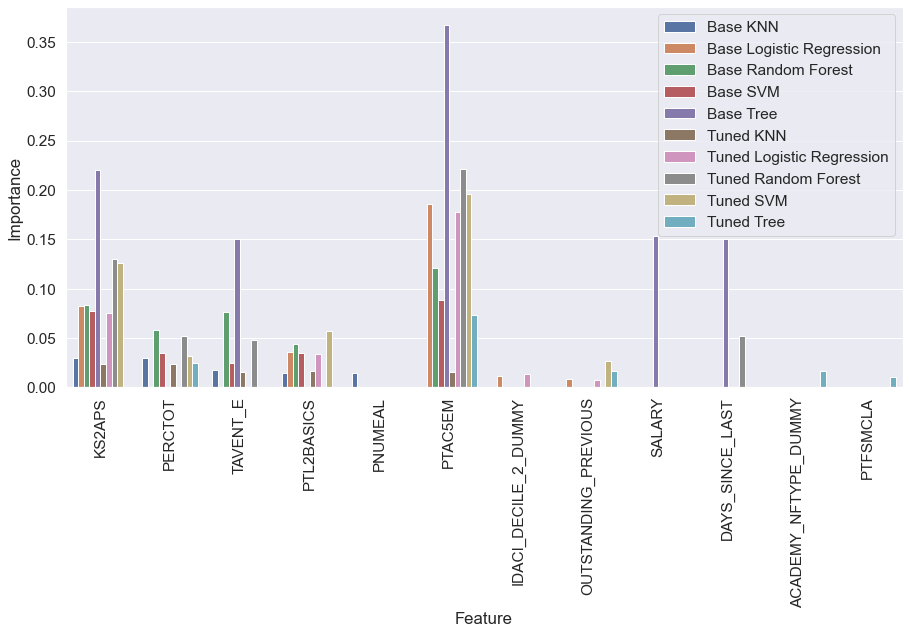

In [105]:
fig, ax = plt.subplots(figsize=(15,7))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(font_scale = 1.4)

#create grouped bar chart
sns.barplot(x='Feature',
            y='Importance', 
            hue='Model', 
            data=top_5_features) 

plt.xticks(rotation=90)
ax.legend(loc="upper right")
plt.show()

In [106]:
all_importances = all_permutation_importances.groupby(['Feature'])['Importance'].mean().reset_index()

In [107]:
ordered_total = all_importances.sort_values(by = 'Importance', ascending = False).head(5)

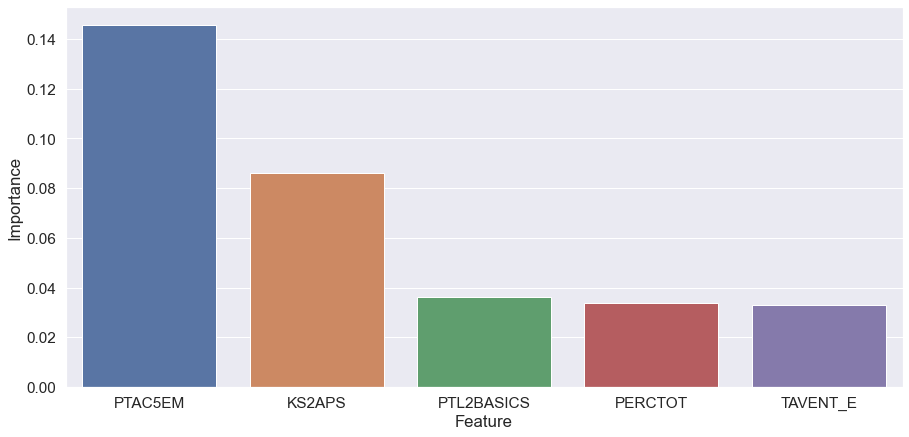

In [108]:
fig, ax = plt.subplots(figsize=(15,7))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(font_scale = 1.4)

#create grouped bar chart
sns.barplot(x='Feature',
            y='Importance', 
            data=ordered_total) 

#plt.xticks(rotation=90)

plt.show()

In [115]:
unordered_total = all_importances.sort_values(by = 'Importance', ascending = True).head(5)

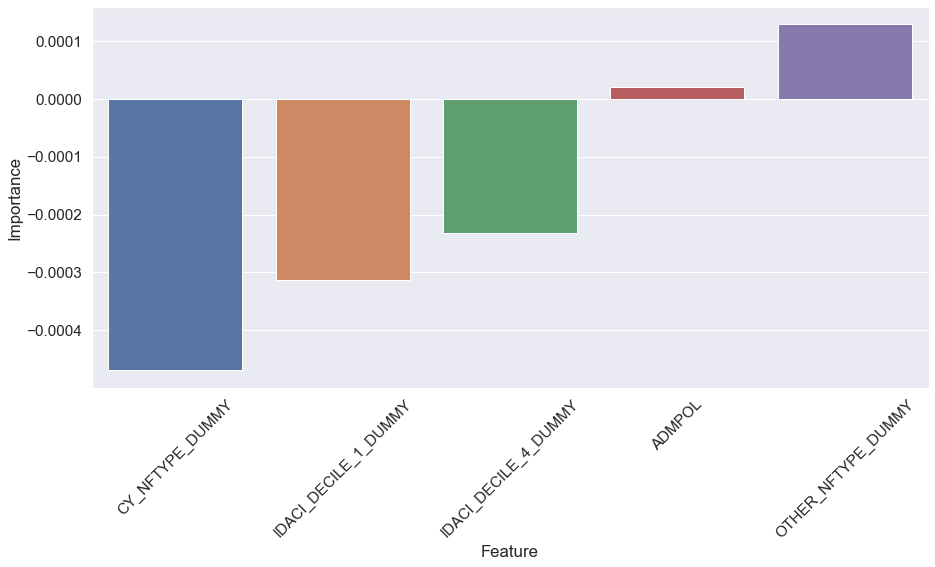

In [117]:
fig, ax = plt.subplots(figsize=(15,7))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(font_scale = 1.4)

#create grouped bar chart
sns.barplot(x='Feature',
            y='Importance', 
            data=unordered_total) 

plt.xticks(rotation=45)

plt.show()

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html